In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
uni=pd.read_csv(r"D:\ExcelR Solution\Data Science\DataSets\Universities.csv")
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
uni.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [4]:
#Considering only numerical data

In [5]:
uni=uni.iloc[:,1:]
uni.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [6]:
#Converting into numpy array

In [7]:
UNI=uni.values
UNI

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [8]:
#Normalizing the numerical data

In [26]:
std=StandardScaler()
uni_normal=std.fit_transform(UNI)
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [30]:
pca=PCA(n_components=2)
uni_pca = pca2.fit_transform(uni_normal)
uni_pca

array([[-1.00987445, -1.06430962],
       [-2.82223781,  2.25904458],
       [ 1.11246577,  1.63120889],
       [-0.74174122, -0.04218747],
       [-0.31191206, -0.63524357],
       [-1.69669089, -0.34436328],
       [-1.24682093, -0.49098366],
       [-0.33874978, -0.78516859],
       [-2.37415013, -0.38653888],
       [-1.40327739,  2.11951503],
       [-1.72610332,  0.08823712],
       [-0.45085748, -0.01113295],
       [ 0.04023814, -1.00920438],
       [ 3.23373034, -0.37458049],
       [-2.23626502, -0.37179329],
       [ 5.17299212,  0.77991535],
       [-1.69964377, -0.30559745],
       [ 4.578146  , -0.34759136],
       [ 0.82260312, -0.69890615],
       [-0.09776213,  0.65044645],
       [ 1.9631826 , -0.22476756],
       [-0.54228894, -0.07958884],
       [ 0.53222092, -1.0171672 ],
       [ 3.54869664,  0.77846167],
       [-2.30590032, -0.11770432]])

In [31]:
pca2=PCA(n_components=3)
uni_pca2 = pca2.fit_transform(uni_normal)
uni_pca2

array([[-1.00987445, -1.06430962,  0.08106631],
       [-2.82223781,  2.25904458,  0.83682883],
       [ 1.11246577,  1.63120889, -0.26678684],
       [-0.74174122, -0.04218747,  0.06050086],
       [-0.31191206, -0.63524357,  0.01024052],
       [-1.69669089, -0.34436328, -0.25340751],
       [-1.24682093, -0.49098366, -0.03209382],
       [-0.33874978, -0.78516859, -0.49358483],
       [-2.37415013, -0.38653888,  0.11609839],
       [-1.40327739,  2.11951503, -0.44282714],
       [-1.72610332,  0.08823712,  0.17040366],
       [-0.45085748, -0.01113295, -0.17574605],
       [ 0.04023814, -1.00920438, -0.49651717],
       [ 3.23373034, -0.37458049, -0.49537282],
       [-2.23626502, -0.37179329, -0.39899365],
       [ 5.17299212,  0.77991535, -0.38591233],
       [-1.69964377, -0.30559745,  0.31850785],
       [ 4.578146  , -0.34759136,  1.49964176],
       [ 0.82260312, -0.69890615,  1.42781145],
       [-0.09776213,  0.65044645,  0.10050844],
       [ 1.9631826 , -0.22476756, -0.255

In [12]:
pca2=PCA(n_components=2)
pca_components=pd.DataFrame(pca2.fit_transform(uni_normal),columns=['a','b'])
pca_components.head(1)

,a,b
0,-1.009874,-1.06431


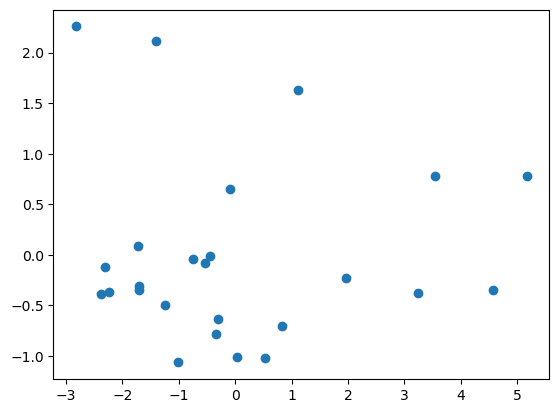

In [13]:
plt.scatter(pca_components.a,pca_components.b)

In [14]:
from sklearn.datasets import load_breast_cancer

In [15]:
dir(load_breast_cancer)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [16]:
data=load_breast_cancer(as_frame=True).frame
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
X=data.drop('target',axis=1)
X.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [18]:
Y=data.target

In [19]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [20]:
import pandas as pd

In [21]:
pca=PCA(2)
x=pd.DataFrame(pca.fit_transform(X),columns=['a','b'])

In [22]:
import matplotlib.pyplot as plt

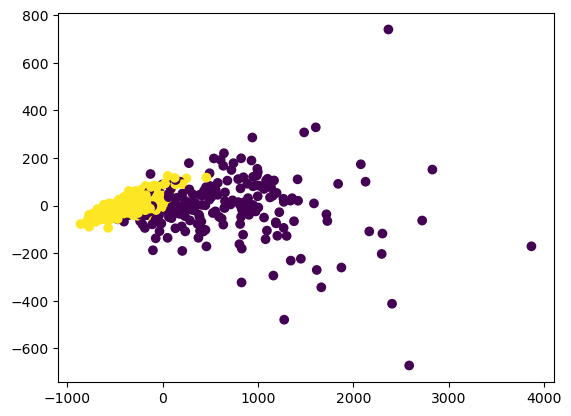

In [23]:
plt.scatter(x.a,x.b,c=Y)

In [24]:
from sklearn.manifold import TSNE

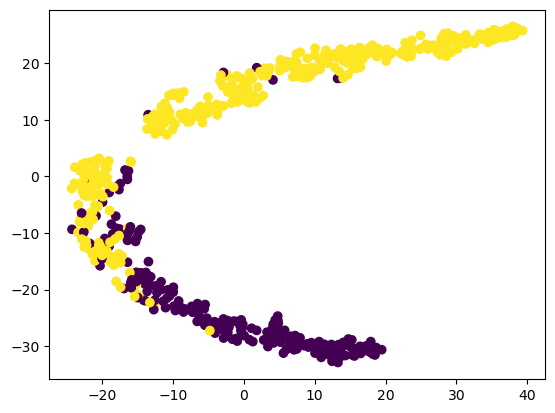

In [25]:
tsne=TSNE()
x=pd.DataFrame(tsne.fit_transform(X),columns=['a','b'])
plt.scatter(x.a,x.b,c=Y)
plt.show()